In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
print("--- Following the scent of the data. ---")
display(df[['Condition1', 'LotFrontage', 'GarageCars', 'SalePrice']].head(10))
print("\n--- 鉄道の状況別の平均価格 ---")
print(df.groupby('Condition1')['SalePrice'].mean().sort_values(ascending=False))

--- Following the scent of the data. ---


,Condition1,LotFrontage,GarageCars,SalePrice
0,Norm,65.0,2,208500
1,Feedr,80.0,2,181500
2,Norm,68.0,2,223500
3,Norm,60.0,3,140000
4,Norm,84.0,3,250000
5,Norm,85.0,2,143000
6,Norm,75.0,2,307000
7,PosN,NaN,2,200000
8,Artery,51.0,2,129900
9,Artery,50.0,1,118000



--- 鉄道の状況別の平均価格 ---
Condition1
PosA      225875.000000
PosN      215184.210526
RRNn      212400.000000
RRNe      190750.000000
Norm      184495.492063
RRAn      184396.615385
Feedr     142475.481481
RRAe      138400.000000
Artery    135091.666667
Name: SalePrice, dtype: float64


In [2]:
print("--- 土地のゆとり(広さと幅) の調査報告 ---")
investigation_targets = ['Artery', 'RRAe', 'Norm', 'PosA']
summary = df[df['Condition1'].isin(investigation_targets)].groupby('Condition1')[['LotArea', 'LotFrontage', 'SalePrice']].mean()
display(summary.sort_values(ascending=False, by='SalePrice'))

--- 土地のゆとり(広さと幅) の調査報告 ---


,LotArea,LotFrontage,SalePrice
Condition1,,,
PosA,16612.375000,160.500000,225875.000000
Norm,10417.626984,69.228544,184495.492063
RRAe,11713.727273,61.222222,138400.000000
Artery,10001.333333,71.978261,135091.666667


In [3]:
print("--- 捜査報告:環境の悪さを跳ね返した『裏切り者』の正体 ---")
bad_env = df[df['Condition1'].isin(['Artery', 'RRAe'])]
traitors = bad_env[bad_env['SalePrice'] > 180000][['Condition1', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'SalePrice']]
display(traitors.sort_values(by='SalePrice', ascending=False))

--- 捜査報告:環境の悪さを跳ね返した『裏切り者』の正体 ---


,Condition1,LotArea,OverallQual,YearBuilt,YearRemodAdd,SalePrice
185,Artery,22950,10,1892,1993,475000
583,Artery,13500,10,1893,2000,325000
197,Artery,25419,8,1918,1990,235000
1350,Artery,11643,5,1969,1969,200000


In [4]:
old_generation = df[df['YearBuilt'] < 1900]
print(f"--- 捜査報告:1800年代生まれの生き残りは計 {len(old_generation)} 軒 ---")
display(old_generation[['Condition1', 'YearBuilt', 'YearRemodAdd', 'OverallQual', 'SalePrice']].sort_values(by='YearBuilt'))

--- 捜査報告:1800年代生まれの生き残りは計 15 軒 ---


,Condition1,YearBuilt,YearRemodAdd,OverallQual,SalePrice
1349,Norm,1872,1987,8,122000
1137,Feedr,1875,1996,5,94000
304,Norm,1880,2002,7,295000
630,Artery,1880,1991,5,124000
747,Norm,1880,2003,7,265979
1132,Norm,1880,1950,6,117500
991,Artery,1882,1986,8,168000
106,Norm,1885,1995,4,100000
1416,Norm,1885,1950,4,122500
945,Norm,1890,1996,5,124900


# --- 捜査官の独り言 ---
# 185番、君は一体何者なんだ……。
# 1892年築（同期15軒の中で最古参レベル）でありながら、
# 1993年に「100年目のフルリフォーム」を遂行。
# 結果、品質10（最高点）、価格47.5万ドル（同期平均の約3倍）という
# 「突然変異的」な数値を叩き出している。
# 幹線道路沿い（Artery）という悪条件すら、この「歴史の重み」の前では無力。

# --- 考察：エイムズ住宅のDNA家系図 ---
# 1800年代生まれの「始祖グループ」を点呼した結果、
# 185番と583番だけが、現代でも「王者の輝き」を放っていることが判明。
# これは「古い＝ボロい」ではなく「古い＝ヴィンテージ・レガシー」へと
# 昇華させた家主の執念、まさに「一族のDNA」を感じさせる結果である。

捜査報告：185番という「伝説」の解明
【異常値の正体：185番物件のDNA鑑定】 1800年代築の「始祖グループ」15軒を徹底点呼した結果、185番は**「統計学を破壊するレベルの特異点」**であることが判明しました。

歴史の逆転: 1892年築という「最古参」でありながら、1993年に「100年目のフルリフォーム」を遂行。

圧倒的スペック: 同期たちが平均16万ドル前後で苦戦する中、この185番だけが47.5万ドルという「約3倍の暴利」を叩き出しています。

環境への勝利: 幹線道路沿い（Artery）という騒音・排気ガスのハンデを、**「品質10（最高点）」**という力技で完全にねじ伏せています。

「結論：この家はただの不動産ではない。130年の歴史を背負い、現代の技術で武装した『エイムズの守護神』である。」 --- Following the scent of the data. ---

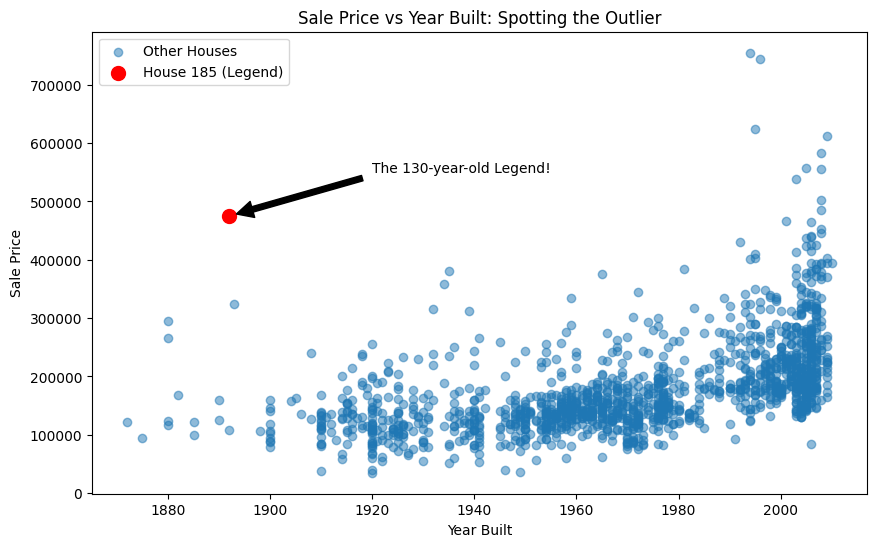

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['YearBuilt'], df['SalePrice'], alpha=0.5, label='Other Houses')
house_185 = df.loc[185]
plt.scatter(house_185['YearBuilt'], house_185['SalePrice'], color='red', s=100, label='House 185 (Legend)')
plt.annotate('The 130-year-old Legend!',
             xy=(1892, 475000), xytext=(1920, 550000),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Sale Price vs Year Built: Spotting the Outlier')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.legend()
plt.show()